# definition 3

In [11]:
from keras.preprocessing.text import Tokenizer
import codecs
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
from konlpy.tag import Okt
from tqdm import tqdm

# train set
name = "3"
filename1 = './spy/spy/definition'+name+'_spynorth_scaling_trust.txt'
filename2 = './spy/spy/definition'+name+'_spynorth_scaling_untrust.txt'


with codecs.open(filename1, 'r', encoding='utf-8') as f:
    lines1 = f.readlines()
with codecs.open(filename2, 'r', encoding='utf-8') as f:
    lines2 = f.readlines()




# test set


with codecs.open('./spy/spy/definition'+name+'_spynorth_test_t.txt', 'r', 'utf-8') as f:
    test1 = f.readlines()
with codecs.open('./spy/spy/definition'+name+'_spynorth_test_ut.txt', 'r', 'utf-8') as f:
    test2 = f.readlines()


    



## movie 1

In [12]:
lines_t = lines1[:4560]
lines_ut = lines2[:4560]
test_t = test1[:1140]
test_ut = test2[:1140]

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 2280/2280 [08:10<00:00,  4.65it/s]


### simpleRNN

Epoch 1/10
57/57 [==============================] - 19s 265ms/step - loss: 0.6603 - acc: 0.6218 - val_loss: 0.9881 - val_acc: 0.0000e+00
Epoch 2/10
57/57 [==============================] - 12s 219ms/step - loss: 0.6077 - acc: 0.6760 - val_loss: 1.0389 - val_acc: 0.0795
Epoch 3/10
57/57 [==============================] - 14s 238ms/step - loss: 0.4950 - acc: 0.7991 - val_loss: 0.9350 - val_acc: 0.3465
Epoch 4/10
57/57 [==============================] - 14s 245ms/step - loss: 0.3419 - acc: 0.8883 - val_loss: 0.9768 - val_acc: 0.4172
Epoch 5/10
57/57 [==============================] - 14s 249ms/step - loss: 0.2207 - acc: 0.9516 - val_loss: 1.3425 - val_acc: 0.3109
Epoch 6/10
57/57 [==============================] - 14s 242ms/step - loss: 0.1168 - acc: 0.9803 - val_loss: 1.2981 - val_acc: 0.4205
Epoch 7/10
57/57 [==============================] - 14s 241ms/step - loss: 0.0630 - acc: 0.9911 - val_loss: 1.5074 - val_acc: 0.3887
Epoch 8/10
57/57 [==============================] - 14s 244ms/ste

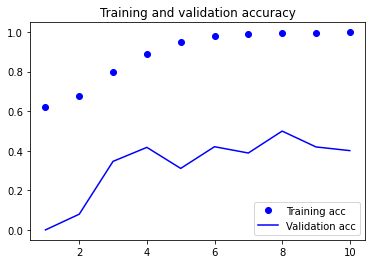

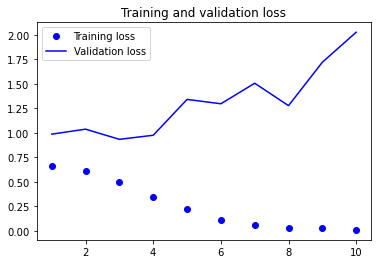

72/72 [==============================] - 2s 34ms/step - loss: 1.5481 - acc: 0.5009: 0s - loss: 1.3547 


[1.5480825901031494, 0.5008772015571594]

In [13]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
57/57 [==============================] - 37s 593ms/step - loss: 0.6468 - acc: 0.6231 - val_loss: 0.8957 - val_acc: 0.0159
Epoch 2/10
57/57 [==============================] - 31s 540ms/step - loss: 0.6149 - acc: 0.6542 - val_loss: 1.0361 - val_acc: 0.1595
Epoch 3/10
57/57 [==============================] - 31s 539ms/step - loss: 0.5680 - acc: 0.7208 - val_loss: 1.0114 - val_acc: 0.4227
Epoch 4/10
57/57 [==============================] - 31s 544ms/step - loss: 0.5012 - acc: 0.7675 - val_loss: 1.0337 - val_acc: 0.4441
Epoch 5/10
57/57 [==============================] - 30s 535ms/step - loss: 0.4394 - acc: 0.8055 - val_loss: 1.4191 - val_acc: 0.3109
Epoch 6/10
57/57 [==============================] - 32s 556ms/step - loss: 0.3867 - acc: 0.8339 - val_loss: 0.8999 - val_acc: 0.5713
Epoch 7/10
57/57 [==============================] - 31s 537ms/step - loss: 0.3405 - acc: 0.8616 - val_loss: 0.8916 - val_acc: 0.5729
Epoch 8/10
57/57 [==============================] - 31s 547ms/step - 

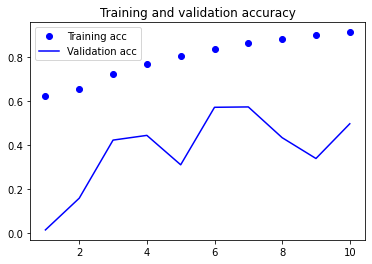

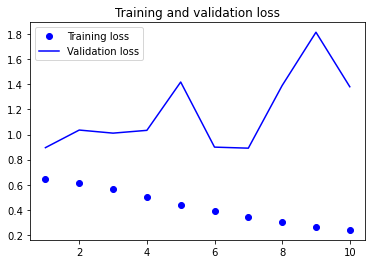

72/72 [==============================] - 5s 64ms/step - loss: 1.1825 - acc: 0.5162: 0s - loss: 1.11


[1.1824737787246704, 0.5162280797958374]

In [14]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## movie 2

In [15]:
lines_t = lines1[:3760]
lines_ut = lines2[:3760]
test_t = test1[:940]
test_ut = test2[:940]

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 1880/1880 [06:08<00:00,  5.10it/s]


### simpleRNN

Epoch 1/10
47/47 [==============================] - 16s 262ms/step - loss: 0.6627 - acc: 0.6067 - val_loss: 0.8897 - val_acc: 0.0346
Epoch 2/10
47/47 [==============================] - 10s 223ms/step - loss: 0.6161 - acc: 0.6566 - val_loss: 0.9380 - val_acc: 0.1543
Epoch 3/10
47/47 [==============================] - 11s 230ms/step - loss: 0.5464 - acc: 0.7487 - val_loss: 0.9908 - val_acc: 0.2520
Epoch 4/10
47/47 [==============================] - 11s 230ms/step - loss: 0.4394 - acc: 0.8431 - val_loss: 0.9071 - val_acc: 0.3949
Epoch 5/10
47/47 [==============================] - 10s 220ms/step - loss: 0.3176 - acc: 0.9124 - val_loss: 1.0383 - val_acc: 0.3750
Epoch 6/10
47/47 [==============================] - 11s 224ms/step - loss: 0.2051 - acc: 0.9563 - val_loss: 1.2349 - val_acc: 0.3770
Epoch 7/10
47/47 [==============================] - 10s 223ms/step - loss: 0.1236 - acc: 0.9794 - val_loss: 1.0203 - val_acc: 0.4967
Epoch 8/10
47/47 [==============================] - 11s 226ms/step - 

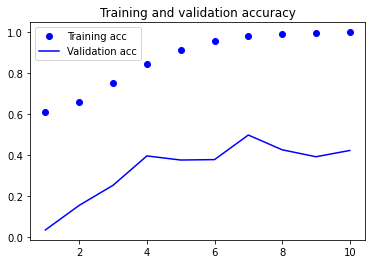

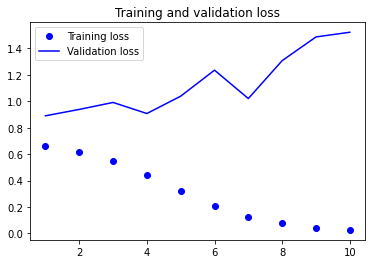

59/59 [==============================] - 2s 33ms/step - loss: 1.2123 - acc: 0.5298


[1.2122712135314941, 0.5297872424125671]

In [16]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
47/47 [==============================] - 28s 529ms/step - loss: 0.6393 - acc: 0.6235 - val_loss: 0.8308 - val_acc: 0.0273
Epoch 2/10
47/47 [==============================] - 24s 517ms/step - loss: 0.5984 - acc: 0.6671 - val_loss: 1.3374 - val_acc: 0.1117
Epoch 3/10
47/47 [==============================] - 24s 503ms/step - loss: 0.5616 - acc: 0.7314 - val_loss: 0.8163 - val_acc: 0.5638
Epoch 4/10
47/47 [==============================] - 23s 501ms/step - loss: 0.5161 - acc: 0.7699 - val_loss: 1.1762 - val_acc: 0.3863
Epoch 5/10
47/47 [==============================] - 23s 491ms/step - loss: 0.4595 - acc: 0.8022 - val_loss: 0.8374 - val_acc: 0.6090
Epoch 6/10
47/47 [==============================] - 23s 488ms/step - loss: 0.3911 - acc: 0.8433 - val_loss: 1.2043 - val_acc: 0.4681
Epoch 7/10
47/47 [==============================] - 23s 487ms/step - loss: 0.3534 - acc: 0.8629 - val_loss: 1.1527 - val_acc: 0.4953
Epoch 8/10
47/47 [==============================] - 28s 601ms/step - 

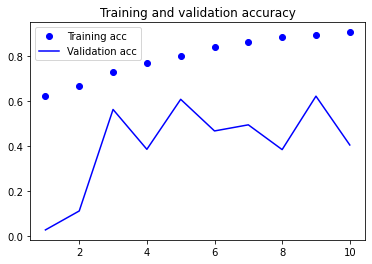

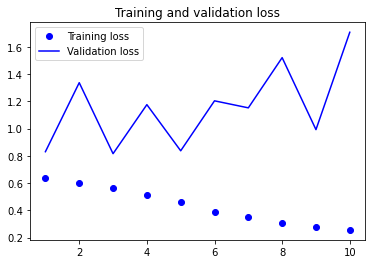

59/59 [==============================] - 4s 63ms/step - loss: 1.1176 - acc: 0.5670: 1s - loss: 


[1.117606282234192, 0.5670212507247925]

In [17]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

## movie3

In [18]:
lines_t = lines1[:2960]
lines_ut = lines2[:2960]
test_t = test1[:740]
test_ut = test2[:740]

lines_ = []
test_lines_ = []
for line in lines_t:
    lines_.append(line.strip())

for line in lines_ut:
    lines_.append(line.strip())

for line in test_t:
    test_lines_.append(line.strip()) # trust
for line in test_ut:
    test_lines_.append(line.strip()) # untrust

train_labels = [] # train 데이터 label
test_labels = [] # test 데이터 label
for i in range(len(lines_t)):
    train_labels.append(0)
for j in range(len(lines_ut)):
    train_labels.append(1)
for i in range(len(test_t)):
    test_labels.append(0)
for j in range(len(test_ut)):
    test_labels.append(1)
    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

okt = Okt()
x_train = []
x_test = []
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

for sentence in tqdm(lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_train.append(stopwords_removed_sentence)

for sentence in tqdm(test_lines_):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    x_test.append(stopwords_removed_sentence)

maxlen = 1000  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200 -> 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다
# train 토큰화
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

word_index = tokenizer.word_index
train = pad_sequences(sequences,maxlen=maxlen)

# test 토큰화
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(x_test)
sequences2 = tokenizer2.texts_to_sequences(x_test)

word_index2 = tokenizer2.word_index
test = pad_sequences(sequences2,maxlen=maxlen)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 1480/1480 [04:45<00:00,  5.18it/s]


### simpleRNN

Epoch 1/10
37/37 [==============================] - 17s 270ms/step - loss: 0.6510 - acc: 0.6347 - val_loss: 0.9596 - val_acc: 0.0118
Epoch 2/10
37/37 [==============================] - 9s 233ms/step - loss: 0.6230 - acc: 0.6539 - val_loss: 0.8530 - val_acc: 0.2796
Epoch 3/10
37/37 [==============================] - 8s 224ms/step - loss: 0.5235 - acc: 0.7889 - val_loss: 0.8419 - val_acc: 0.3682
Epoch 4/10
37/37 [==============================] - 8s 229ms/step - loss: 0.4276 - acc: 0.8577 - val_loss: 1.4252 - val_acc: 0.0245
Epoch 5/10
37/37 [==============================] - 9s 235ms/step - loss: 0.3520 - acc: 0.8959 - val_loss: 1.4847 - val_acc: 0.2416
Epoch 6/10
37/37 [==============================] - 8s 226ms/step - loss: 0.3687 - acc: 0.8564 - val_loss: 1.1594 - val_acc: 0.2593
Epoch 7/10
37/37 [==============================] - 8s 212ms/step - loss: 0.2038 - acc: 0.9599 - val_loss: 0.8817 - val_acc: 0.5051
Epoch 8/10
37/37 [==============================] - 9s 235ms/step - loss: 0

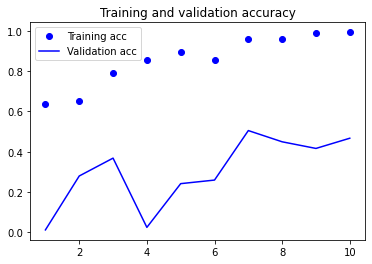

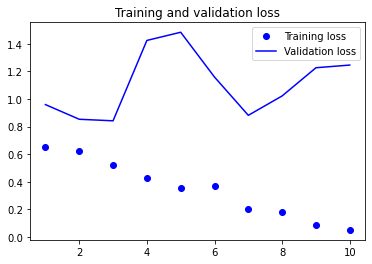

47/47 [==============================] - 1s 28ms/step - loss: 1.0806 - acc: 0.5318


[1.0806273221969604, 0.5317567586898804]

In [19]:
from keras.preprocessing import sequence
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

max_features = 10000  # 특성으로 사용할 단어의 수

batch_size = 32
input_train = sequence.pad_sequences(train,maxlen=maxlen)
input_test = sequence.pad_sequences(test,maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_simpleRNN1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

### LSTM

Epoch 1/10
37/37 [==============================] - 26s 593ms/step - loss: 0.6369 - acc: 0.6242 - val_loss: 1.0803 - val_acc: 0.0068
Epoch 2/10
37/37 [==============================] - 20s 541ms/step - loss: 0.5870 - acc: 0.7143 - val_loss: 1.0545 - val_acc: 0.3505
Epoch 3/10
37/37 [==============================] - 21s 558ms/step - loss: 0.5425 - acc: 0.7534 - val_loss: 1.0206 - val_acc: 0.4747
Epoch 4/10
37/37 [==============================] - 20s 552ms/step - loss: 0.4691 - acc: 0.7996 - val_loss: 1.1331 - val_acc: 0.4265
Epoch 5/10
37/37 [==============================] - 20s 552ms/step - loss: 0.4073 - acc: 0.8315 - val_loss: 0.8572 - val_acc: 0.5735
Epoch 6/10
37/37 [==============================] - 20s 542ms/step - loss: 0.3530 - acc: 0.8613 - val_loss: 0.8504 - val_acc: 0.6140
Epoch 7/10
37/37 [==============================] - 20s 553ms/step - loss: 0.3169 - acc: 0.8803 - val_loss: 1.2497 - val_acc: 0.4248
Epoch 8/10
37/37 [==============================] - 20s 540ms/step - 

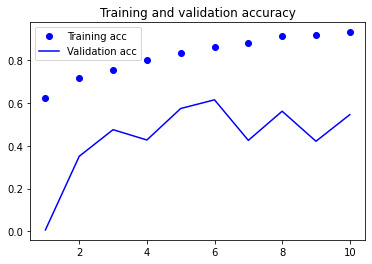

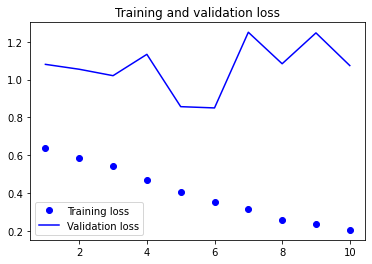

47/47 [==============================] - 3s 62ms/step - loss: 0.9222 - acc: 0.5385: 1s - lo


[0.9222378134727478, 0.5385135412216187]

In [20]:
# LSTM
from keras.layers import LSTM
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_lstm1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

model.evaluate(test, test_labels)

# definition 2